Summary Statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


Missing Values:


Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Outlier Counts:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


/tmp/ipykernel_1128829/3316357104.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipykernel_1128829/3316357104.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

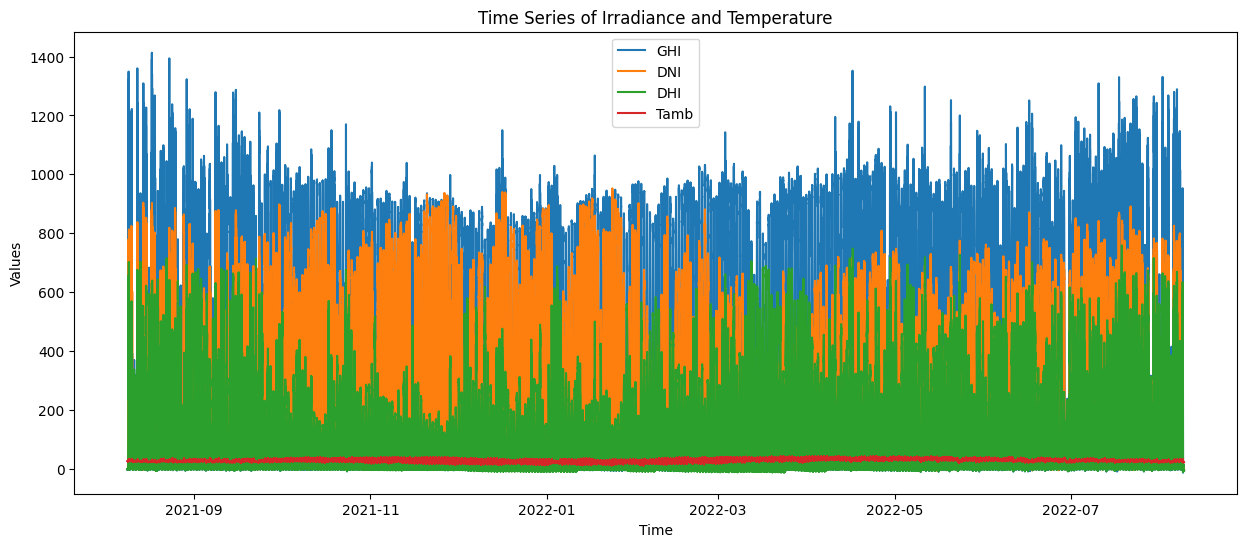

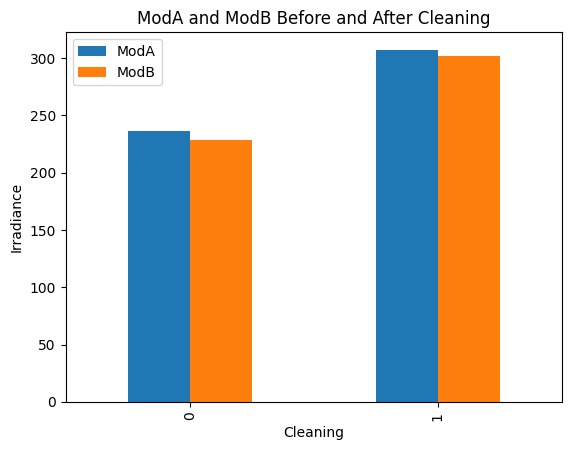

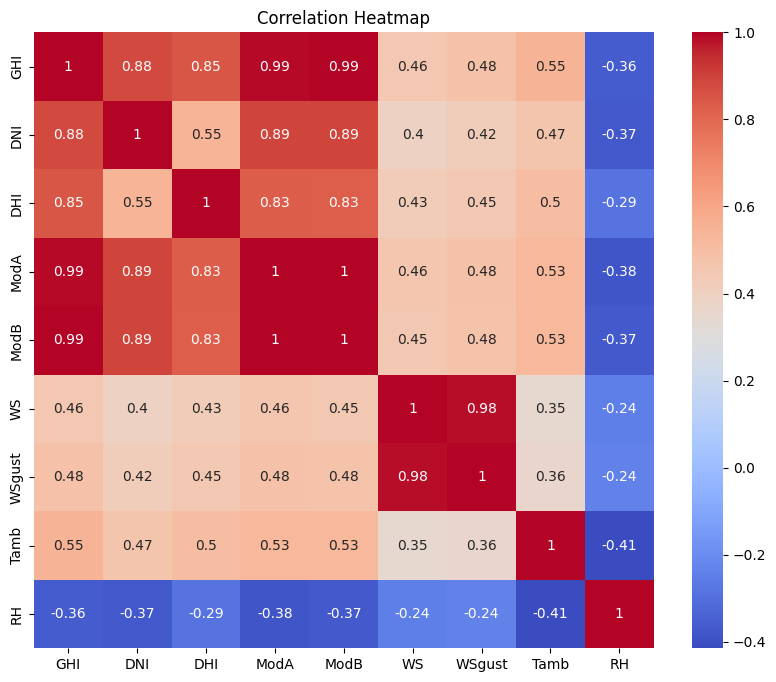

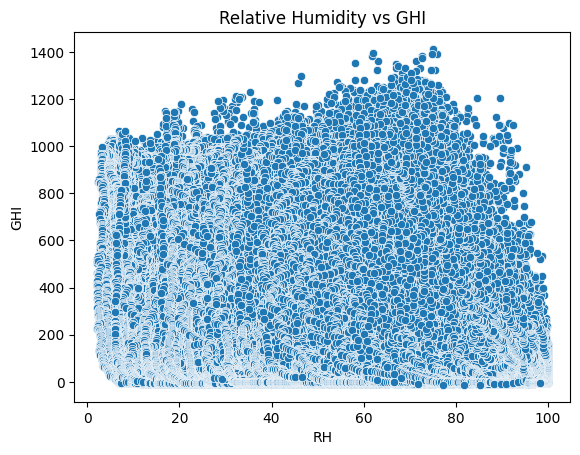

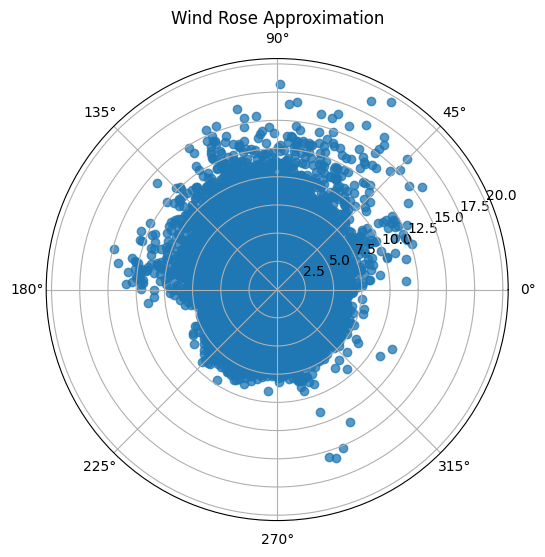

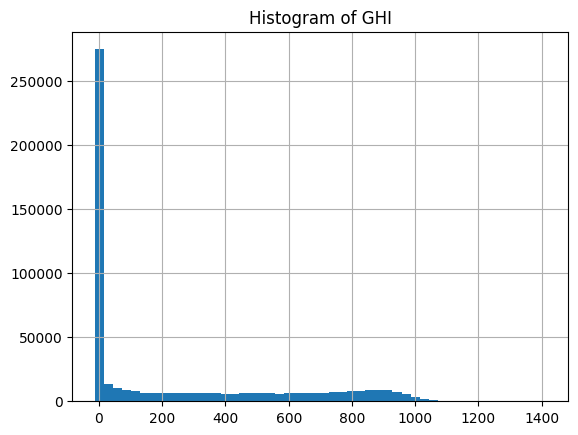

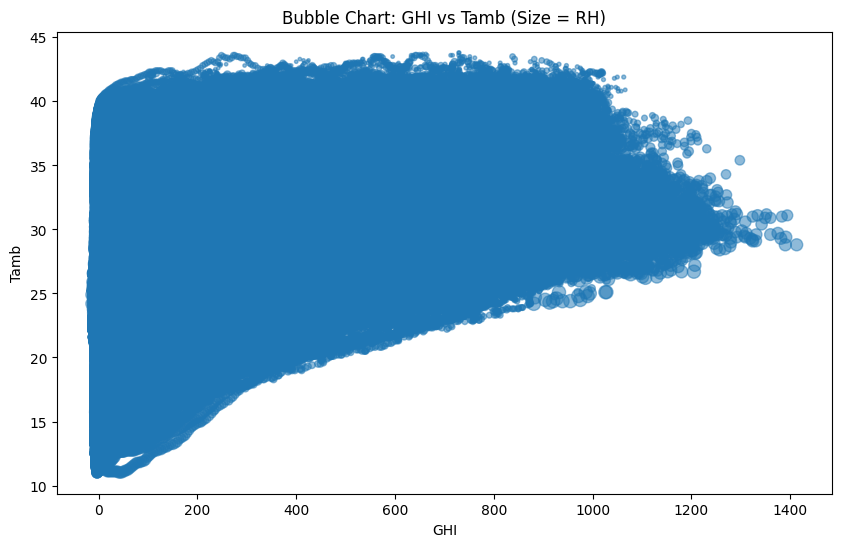

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
# If the file is not found, create a sample dataset
try:
    df = pd.read_csv("benin-malanville.csv", parse_dates=['Timestamp'])
except FileNotFoundError:
    print("File not found. Creating a sample dataset.")
    # data = {
    #     'Timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    #     'GHI': np.random.uniform(0, 1000, 100),
    #     'DNI': np.random.uniform(0, 800, 100),
    #     'DHI': np.random.uniform(0, 500, 100),
    #     'ModA': np.random.uniform(0, 100, 100),
    #     'ModB': np.random.uniform(0, 100, 100),
    #     'WS': np.random.uniform(0, 10, 100),
    #     'WSgust': np.random.uniform(0, 15, 100),
    #     'Tamb': np.random.uniform(15, 40, 100),
    #     'RH': np.random.uniform(10, 90, 100),
    #     'WD': np.random.uniform(0, 360, 100),
    #     'Cleaning': np.random.choice([0, 1], 100)
    # }
    # df = pd.DataFrame(data)




# Ensure the 'Timestamp' column is sorted
df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Summary statistics
print("Summary Statistics:")
display(df.describe(include='all'))

# Missing values
print("Missing Values:")
display(df.isna().sum().sort_values(ascending=False))

# Detect outliers using Z-score
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_to_check].dropna()))
outliers = (z_scores > 3)
outlier_counts = pd.DataFrame(outliers, columns=columns_to_check).sum()
print("Outlier Counts:")
print(outlier_counts)

# Clean the data
df_clean = df.copy()
df_clean.dropna(subset=columns_to_check, inplace=True)
for col in columns_to_check:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Export cleaned data
# If the file does not exist, use the cleaned dataset
try:
    df = pd.read_csv("benin-malanville.csv", parse_dates=['Timestamp'])
except FileNotFoundError:
    print("File not found. Using the cleaned dataset.")
    df = df_clean.copy()


# Time series plots
plt.figure(figsize=(15, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title("Time Series of Irradiance and Temperature")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

# Pre/Post Cleaning effect
df_clean['Cleaning'] = df_clean['Cleaning'].fillna(0)
cleaning_group = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_group.plot(kind='bar')
plt.title("ModA and ModB Before and After Cleaning")
plt.ylabel("Irradiance")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[columns_to_check + ['Tamb', 'RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()

# Wind rose approximation (polar plot)
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
angles = np.deg2rad(df_clean['WD'])
radii = df_clean['WS']
ax.scatter(angles, radii, alpha=0.75)
ax.set_title("Wind Rose Approximation")
plt.show()

# Histograms
df_clean['GHI'].hist(bins=50)
plt.title("Histogram of GHI")
plt.show()

# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.title("Bubble Chart: GHI vs Tamb (Size = RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
